In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('https://raw.githubusercontent.com/rohitmande-inttrvu/healthcare_diabetes_prediction/refs/heads/main/Diabetes.csv')
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


# Data Analysis

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [3]:
df['Outcome'].value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='Age'>

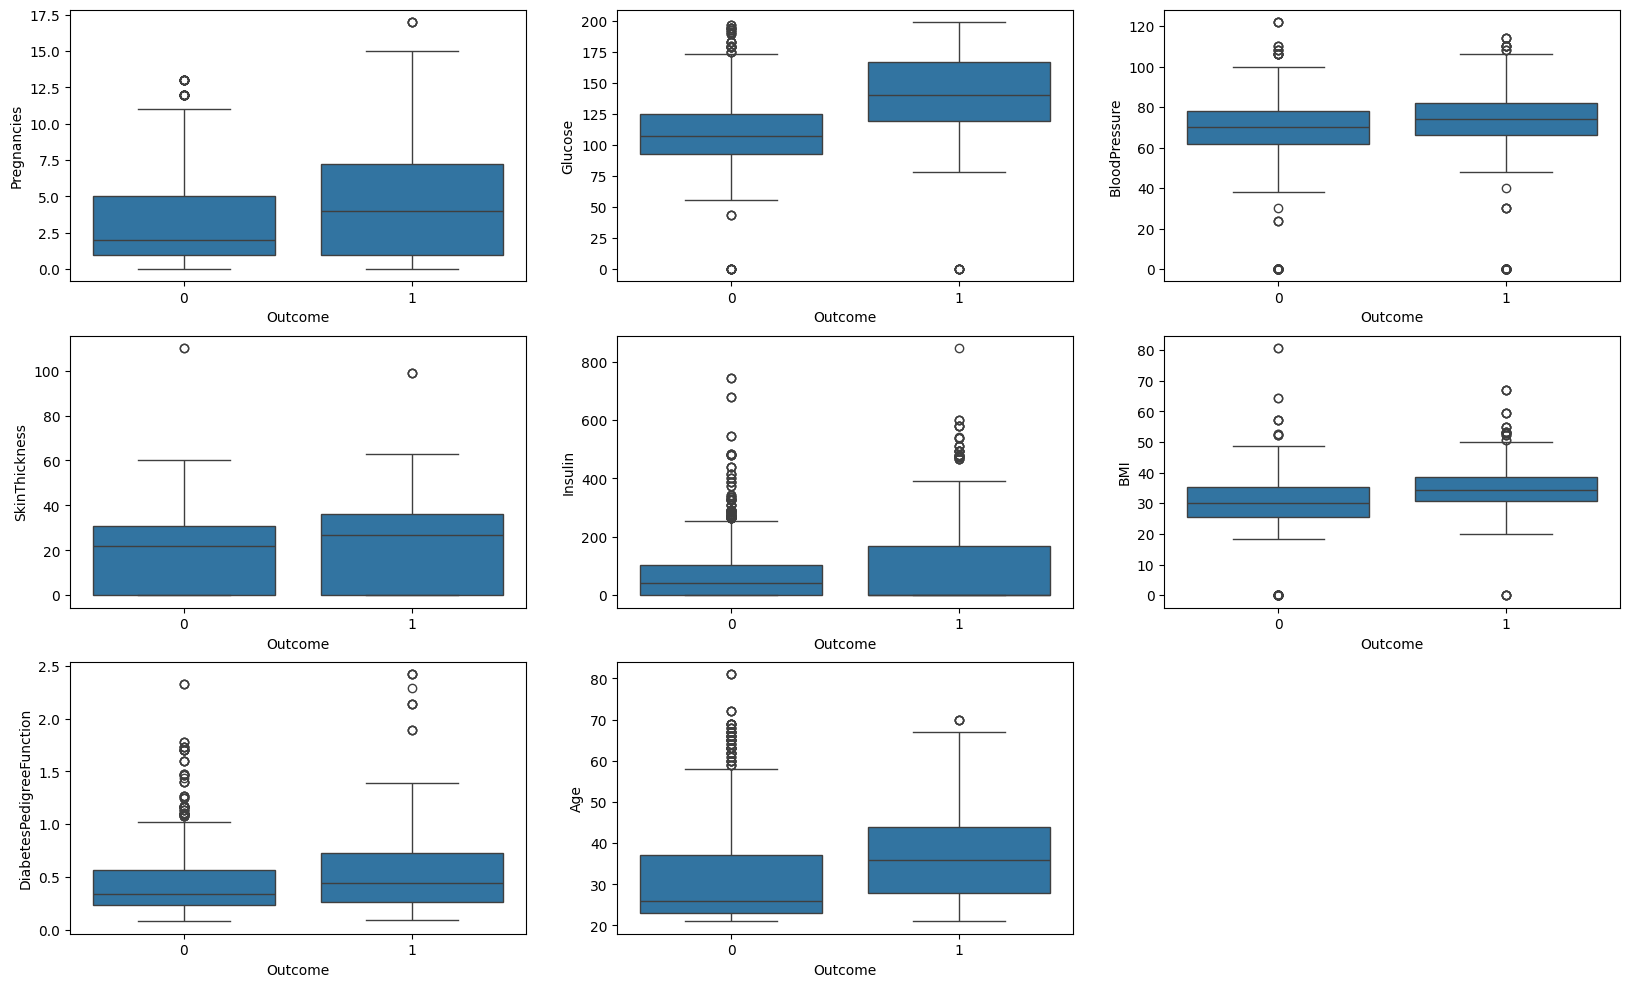

In [4]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='Outcome',y='Pregnancies',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='Outcome',y='Glucose',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Outcome',y='BloodPressure',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='Outcome',y='SkinThickness',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Outcome',y='Insulin',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='Outcome',y='BMI',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='Outcome',y='Age',data=df)

# Data Cleaning

In [5]:
df=df.drop(['Id'],axis=1)
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Data Modeling

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier()
parmas={'n_estimators':[50,100],
        'min_samples_split':[0.01,0.03,0.07,0.1],
        'max_features':[0.7,0.8,0.9,1.0],
        'max_samples':[0.7,0.8,0.9,1.0]
       }
grid=RandomizedSearchCV(estimator=rf,param_distributions=parmas,scoring='accuracy',n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'n_estimators': 50, 'min_samples_split': 0.01, 'max_samples': 0.8, 'max_features': 1.0}


In [7]:
model=RandomForestClassifier(**grid.best_params_,oob_score=True)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f'The Out of Bag score is:{model.oob_score_}')
model.score(X_test,y_test)

The Out of Bag score is:0.931345980126468


0.9205776173285198

In [8]:
tempdf=pd.DataFrame({'Columns':model.feature_names_in_,'importance':model.feature_importances_})
tempdf.sort_values(by='importance',ascending=False)
tempdf

,Columns,importance
0,Pregnancies,0.056031
1,Glucose,0.376778
2,BloodPressure,0.072907
3,SkinThickness,0.043711
4,Insulin,0.043729
5,BMI,0.179111
6,DiabetesPedigreeFunction,0.107117
7,Age,0.120617


<BarContainer object of 8 artists>

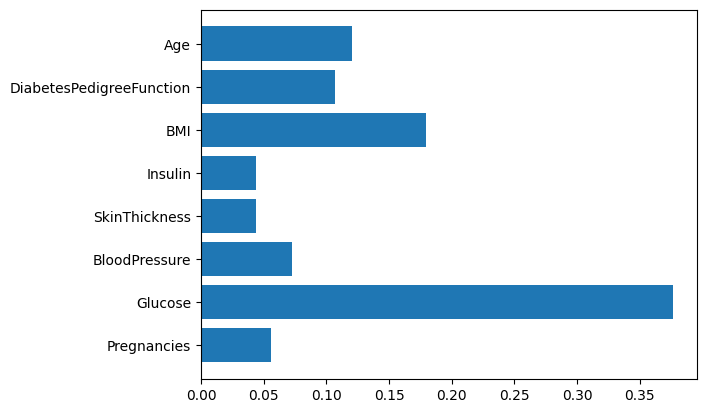

In [10]:
plt.barh(tempdf['Columns'],tempdf['importance'])

In [17]:
searchtempdf=pd.DataFrame(grid.cv_results_)
searchtempdf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_samples,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.353246,0.017485,0.012736,0.001290,100,0.07,1.0,0.7,"{'n_estimators': 100, 'min_samples_split': 0.0...",0.823928,0.851016,0.803612,0.808126,0.805430,0.818422,0.017815,7
1,0.188529,0.008573,0.007898,0.001988,50,0.07,1.0,0.8,"{'n_estimators': 50, 'min_samples_split': 0.07...",0.819413,0.851016,0.821670,0.814898,0.807692,0.822938,0.014829,6
2,0.149479,0.016446,0.006220,0.002045,50,0.10,0.8,0.8,"{'n_estimators': 50, 'min_samples_split': 0.1,...",0.787810,0.826185,0.760722,0.762980,0.757919,0.779123,0.025842,9
3,0.207363,0.016789,0.006326,0.001113,50,0.07,1.0,1.0,"{'n_estimators': 50, 'min_samples_split': 0.07...",0.851016,0.846501,0.812641,0.803612,0.805430,0.823840,0.020618,5
4,0.266895,0.013259,0.009095,0.005189,50,0.01,0.8,1.0,"{'n_estimators': 50, 'min_samples_split': 0.01...",0.957111,0.945824,0.927765,0.884876,0.923077,0.927731,0.024693,1
5,0.324153,0.017425,0.010590,0.002513,100,0.10,0.8,1.0,"{'n_estimators': 100, 'min_samples_split': 0.1...",0.792325,0.830700,0.767494,0.765237,0.751131,0.781377,0.028002,8
6,0.172407,0.020902,0.007591,0.001628,50,0.10,0.7,1.0,"{'n_estimators': 50, 'min_samples_split': 0.1,...",0.781038,0.808126,0.776524,0.772009,0.757919,0.779123,0.016443,9
7,0.465376,0.021308,0.007384,0.002595,100,0.03,1.0,1.0,"{'n_estimators': 100, 'min_samples_split': 0.0...",0.893905,0.878104,0.860045,0.846501,0.857466,0.867204,0.016772,3
8,0.187288,0.011834,0.005664,0.000747,50,0.07,1.0,0.9,"{'n_estimators': 50, 'min_samples_split': 0.07...",0.839729,0.844244,0.817156,0.812641,0.809955,0.824745,0.014336,4
9,0.206939,0.018029,0.004117,0.000815,50,0.01,0.8,0.9,"{'n_estimators': 50, 'min_samples_split': 0.01...",0.939052,0.943567,0.925508,0.889391,0.920814,0.923666,0.019074,2


In [18]:
searchtempdf.sort_values('mean_test_score',inplace=True,ascending=False)
searchtempdf.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_samples,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.266895,0.013259,0.009095,0.005189,50,0.01,0.8,1.0,"{'n_estimators': 50, 'min_samples_split': 0.01...",0.957111,0.945824,0.927765,0.884876,0.923077,0.927731,0.024693,1
9,0.206939,0.018029,0.004117,0.000815,50,0.01,0.8,0.9,"{'n_estimators': 50, 'min_samples_split': 0.01...",0.939052,0.943567,0.925508,0.889391,0.920814,0.923666,0.019074,2
7,0.465376,0.021308,0.007384,0.002595,100,0.03,1.0,1.0,"{'n_estimators': 100, 'min_samples_split': 0.0...",0.893905,0.878104,0.860045,0.846501,0.857466,0.867204,0.016772,3
8,0.187288,0.011834,0.005664,0.000747,50,0.07,1.0,0.9,"{'n_estimators': 50, 'min_samples_split': 0.07...",0.839729,0.844244,0.817156,0.812641,0.809955,0.824745,0.014336,4
3,0.207363,0.016789,0.006326,0.001113,50,0.07,1.0,1.0,"{'n_estimators': 50, 'min_samples_split': 0.07...",0.851016,0.846501,0.812641,0.803612,0.805430,0.823840,0.020618,5


# Evaluation

The accuracy of this model: 0.92

Cross-Validation Accuracy Scores: [0.93506494 0.95670996 0.96095445 0.97180043 0.96746204 0.94143167]
Mean Cross-Validation Accuracy: 0.96
Standard Deviation: 0.01

The Classification Report matrix

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       367
           1       0.89      0.87      0.88       187

    accuracy                           0.92       554
   macro avg       0.91      0.91      0.91       554
weighted avg       0.92      0.92      0.92       554


The Confusion matrix

[[347  20]
 [ 24 163]]


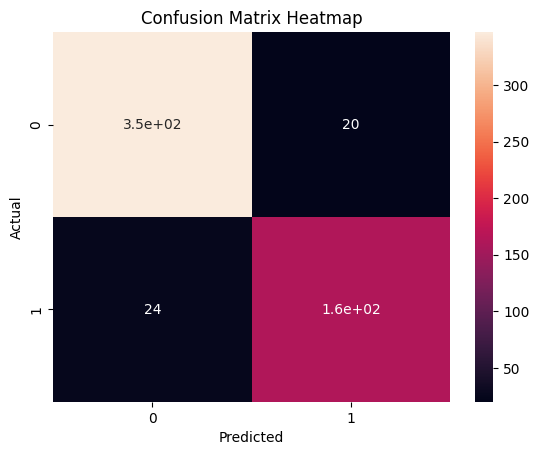

In [11]:
'''
Key metrics for Classification report:

    Precision: The ratio of correctly predicted positive observations to the total predicted positives. 
    It indicates how accurate the positive predictions are.
  
    Recall: The ratio of correctly predicted positive observations to all observations in the actual class. 
    It indicates how well the model can identify positive observations.
  
    F1-score: The weighted average of precision and recall. It gives a balance between precision and recall.
   
    Support: The number of true instances for each label in the dataset.
'''
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns
import numpy as np

# Print the model's accuracy
print(f"The accuracy of this model: {accuracy_score(y_test,y_pred):.2f}")

# Printing Corss validatiob score
cv_scores = cross_val_score(model, X, y, cv=6, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", cv_scores)
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation: {np.std(cv_scores):.2f}")

# Print the classification report
print("\nThe Classification Report matrix\n")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("\nThe Confusion matrix\n")
print(cm)

# Heatmap for the confusion matrix
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')    
plt.title('Confusion Matrix Heatmap')
plt.show()

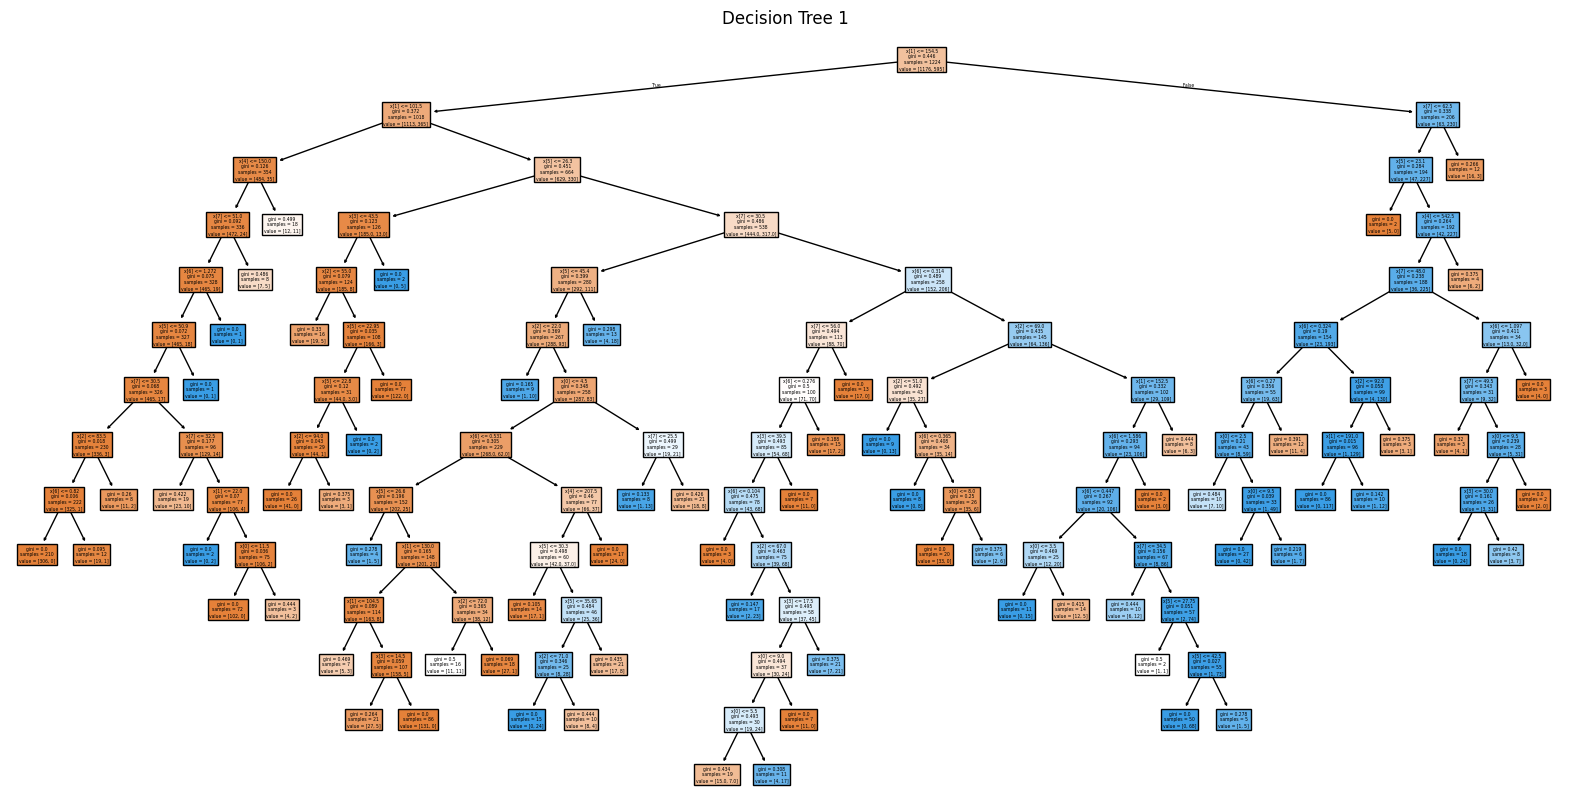

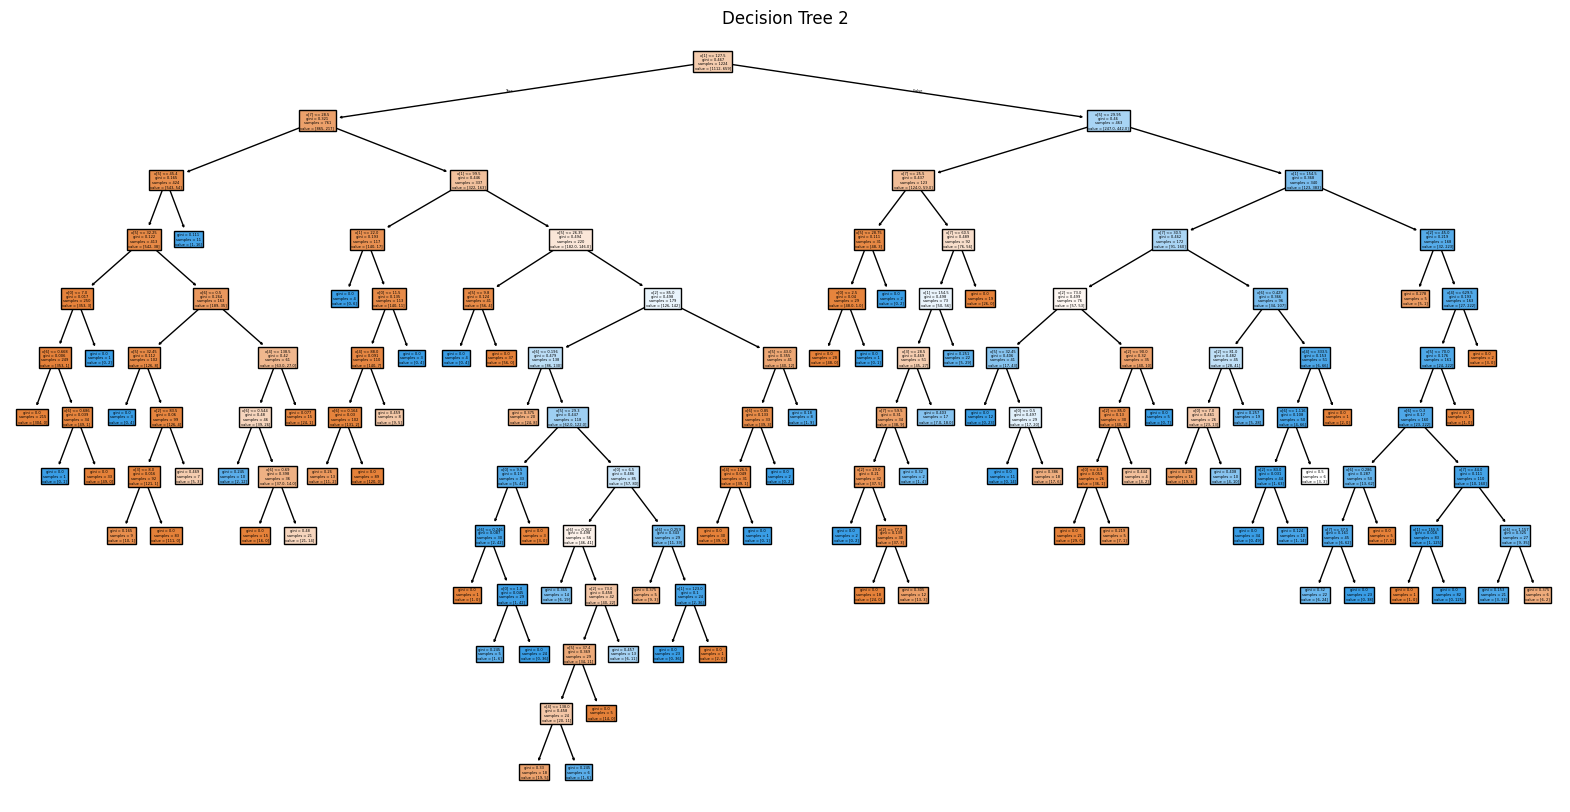

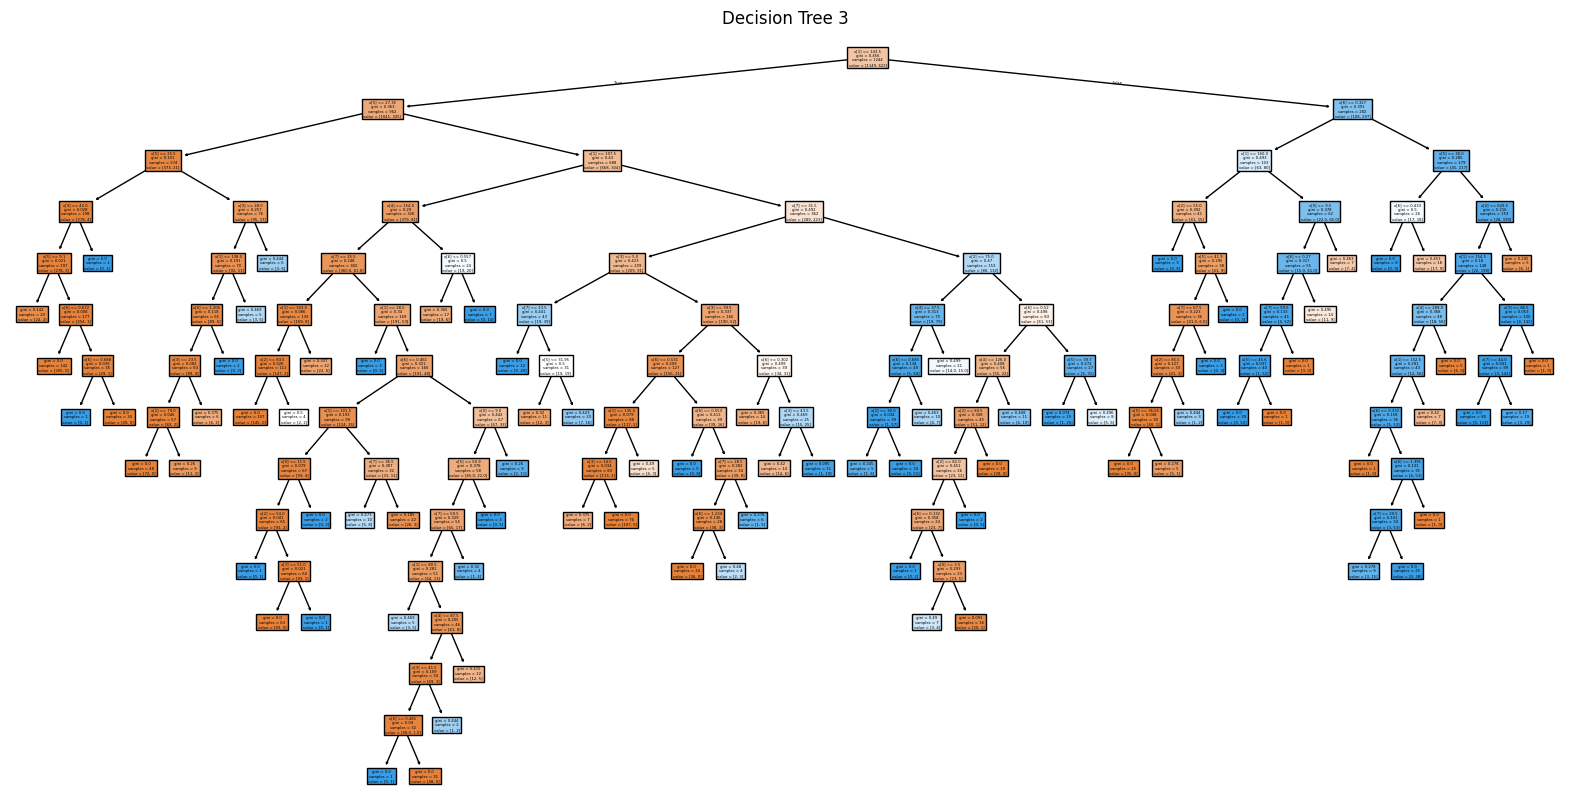

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

for i in [1, 2, 3]:
    plt.figure(figsize=(20, 10))
    plot_tree(model.estimators_[i], 
              filled=True)
    plt.title(f"Decision Tree {i}")
    plt.show()